#About Dataset

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.
The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 5000 images from each class.



#Problem Definition:
    
    
Given an image, can we predict the correct class of this image?

The images are very small (32x32) and by visualizing them you will notice how difficult it is to distinguish them even for a human.

In this notebook we are going to build a CNN model that can classify images of various objects. We have 10 class of images:

1.Airplane
2.Automobile
3.Bird
4.Cat
5.Deer
6.Dog
7.Frog
8.Horse
9.Ship
10.Truck

#Evaluation:

We have 10 classes, so if we pick a image and we randomly gues it class, we have 1/10 probability to be true.

In [23]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
import numpy as np

In [24]:
(X_train,y_train), (X_test,y_test)=datasets.cifar10.load_data()
(X_train.shape)

(50000, 32, 32, 3)

In [25]:
X_test.shape

(10000, 32, 32, 3)

In [26]:
y_train.shape

(50000, 1)

In [27]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

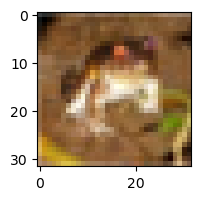

In [28]:
plt.figure(figsize=(15,2))
plt.imshow(X_train[0])

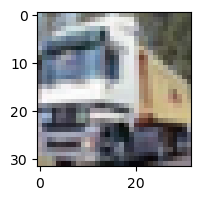

In [29]:
plt.figure(figsize=(15,2))
plt.imshow(X_train[1])

In [30]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [31]:
y_train=y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [32]:
classes=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [16]:
classes[9]

'truck'

In [17]:
def plot_sample(X,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

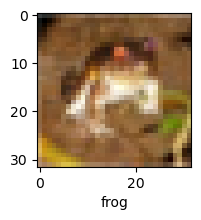

In [18]:
plot_sample(X_train,y_train,0)

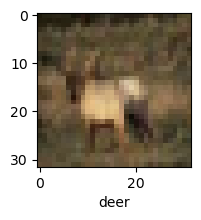

In [19]:
plot_sample(X_train,y_train,3)

In [19]:
#To normalize the data ,we divide each pixel value by 255,pixel value ranges from 0 to 255 for each of the channels RGNV.
#Any few divided by 255 u will be normalizing it into 0 to 1 range.
X_train[0]/255


array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [20]:
X_train=X_train/255
X_test=X_test/255

# Model Building and Training

The best thing about CNN is we no need to tell what the filters are it will figure out the filters for you, you only need to tell
filter size and how many filters you want.filters are nothing but feature detection.for Activation RELU is popular and is less expensive to calculate.

In [25]:
cnn=models.Sequential([
      #CNN
      layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
      layers.MaxPooling2D((2,2)),
    
      layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
      layers.MaxPooling2D((2,2)),
    
       #dense
      layers.Flatten(),
      layers.Dense(64,activation='relu'),
      layers.Dense(10,activation='softmax'),
   ])

In [27]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [28]:
cnn.fit(X_train,y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 69s 41ms/step - loss: 1.4843 - accuracy: 0.4641
Epoch 2/10
1563/1563 [==============================] - 64s 41ms/step - loss: 1.1395 - accuracy: 0.6002
Epoch 3/10
1563/1563 [==============================] - 65s 42ms/step - loss: 1.0039 - accuracy: 0.6486
Epoch 4/10
1563/1563 [==============================] - 66s 42ms/step - loss: 0.9186 - accuracy: 0.6829
Epoch 5/10
1563/1563 [==============================] - 66s 42ms/step - loss: 0.8547 - accuracy: 0.7032
Epoch 6/10
1563/1563 [==============================] - 67s 43ms/step - loss: 0.8032 - accuracy: 0.7213
Epoch 7/10
1563/1563 [==============================] - 67s 43ms/step - loss: 0.7650 - accuracy: 0.7340
Epoch 8/10
1563/1563 [==============================] - 51s 32ms/step - loss: 0.7198 - accuracy: 0.7505
Epoch 9/10
1563/1563 [==============================] - 49s 32ms/step - loss: 0.6883 - accuracy: 0.7613
Epoch 10/10
1563/1563 [==============================] - 49s 32m

In [30]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 3s 9ms/step - loss: 0.9197 - accuracy: 0.6992


[0.9196673631668091, 0.6991999745368958]

In [31]:
y_test[:5]

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)

In [32]:
y_test=y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

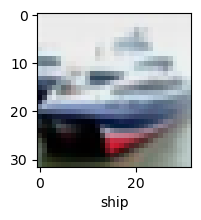

In [33]:
plot_sample(X_test,y_test,1)

In [34]:
y_pred=cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 3s 9ms/step


array([[2.61617708e-03, 5.37946762e-04, 5.21983439e-03, 7.93491185e-01,
        2.13209220e-04, 1.87325850e-01, 3.87813221e-03, 3.56684718e-03,
        2.61569791e-03, 5.35114319e-04],
       [4.33930755e-03, 6.36249408e-03, 1.96014571e-06, 4.51808120e-08,
        2.84567705e-07, 1.53836428e-08, 3.36573280e-09, 5.31360840e-08,
        9.88163531e-01, 1.13225402e-03],
       [4.49580640e-01, 6.69976771e-02, 1.48265073e-02, 1.27349645e-02,
        9.64994356e-03, 7.41673633e-03, 5.33894985e-04, 1.31401373e-02,
        4.21413839e-01, 3.70569387e-03],
       [8.05268407e-01, 9.11779993e-04, 4.40350212e-02, 4.02645115e-03,
        7.65321255e-02, 4.53536864e-04, 1.08369235e-02, 7.56714493e-04,
        5.45495786e-02, 2.62944982e-03],
       [2.89668924e-06, 9.69578764e-08, 1.73900295e-02, 4.35428880e-02,
        6.05750561e-01, 6.58971025e-03, 3.26695949e-01, 1.50200531e-05,
        1.27058693e-05, 3.99230657e-08]], dtype=float32)

In [35]:
#To find which element is max so for that we use argmax function
np.argmax([5,12,1,2])

1

In [37]:
np.argmax([11,10,167,155])

2

In [37]:
np.argmax(y_pred[0])

3

In [38]:
y_classes=[np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 0, 0, 4]

In [39]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

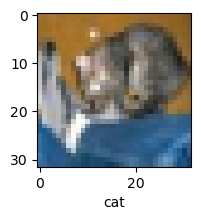

In [40]:
plot_sample(X_test,y_test,0)

In [41]:
classes[y_classes[0]]

'cat'

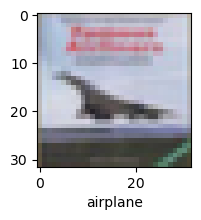

In [45]:
plot_sample(X_test,y_test,3)

In [46]:
classes[y_classes[3]]

'airplane'

In [48]:
from sklearn.metrics import confusion_matrix,classification_report
print("Classification Report: \n", classification_report(y_test,y_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.71      0.77      0.74      1000
           1       0.86      0.75      0.80      1000
           2       0.59      0.60      0.60      1000
           3       0.55      0.49      0.52      1000
           4       0.65      0.64      0.64      1000
           5       0.62      0.59      0.60      1000
           6       0.77      0.77      0.77      1000
           7       0.68      0.80      0.73      1000
           8       0.83      0.76      0.80      1000
           9       0.75      0.81      0.78      1000

    accuracy                           0.70     10000
   macro avg       0.70      0.70      0.70     10000
weighted avg       0.70      0.70      0.70     10000

